# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

In [35]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy import interpolate 

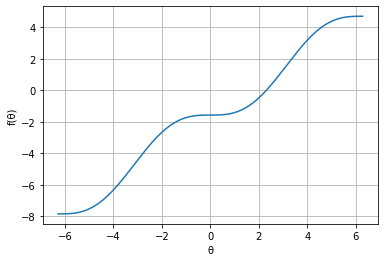


Por el metodo de la bisección se obtiene: 2.3098814600101703
Por el metodo de punto fijo se obtiene: 2.309881460010057
Por el metodo de la secante se obtiene: 2.309881460010033
Por el metodo de Newton raphson se obtiene: 2.3098814600100575


In [36]:
#A) Encontrar la ecuación trascendental
"""θ - sen(θ) = π/2"""

#B) Con la ecuación anterior, definir una funcion  f(θ)=0 . Emplee la funcion labmda de python.

f = lambda θ: θ - np.sin(θ) - np.pi/2 

#C) Construir una data frame de pandas con la columna "theta" con 1000 registros
#(filas) entre  [−2π,2π] . Sugerencia, para construir el data frame emplee la función l
#inspace como sigue : np.linspace(-2np.pi, 2np.pi, 1000 )

θ = np.linspace(-2*np.pi, 2*np.pi, 1000 )

df = pd.DataFrame()
df['θ'] = θ
df['f(θ)']= f(θ)

plt.plot(θ,f(θ))
plt.xlabel("θ")
plt.ylabel("f(θ)")
plt.grid()
plt.show()

#Metodo de la Bisección
root_b = optimize.bisect(f, -2*np.pi, 2*np.pi)
print("\nPor el metodo de la bisección se obtiene: {}".format(root_b))

"""
Tarea: Terminar de probar los otros métodos 
"""

#Metodo del punto fijo

root_fp = optimize.fixed_point(lambda θ: θ - f(θ),0)
print("Por el metodo de punto fijo se obtiene: {}".format(root_fp))

#Metodo de la secante
root_s = optimize.newton(f,2)
print("Por el metodo de la secante se obtiene: {}".format(root_s))

#Metodo de Newton 

root_nr = optimize.newton(f,2,fprime= lambda θ: 1 - np.cos(θ)) 
print("Por el metodo de Newton raphson se obtiene: {}".format(root_nr))

# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.







In [37]:

#Parametros Iniciales
v0 = 60                   #Velocidad en m/s
alpha = np.pi             #Angulo del viento
theta = np.deg2rad(45)    #Angulo de lanzamiento
u = v0/2                  #rapidez del viento
b = 0.05                  #Parametro de friccion 
g = 9.8                   #Aceleracion de la gravedad m/s2
t = np.linspace(0, 12, 1000) #Tiempo 
Params = (alpha, v0, b, u, g)  #Parametros en tupla.


#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    
#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3

x = pos_x(t,theta, *Params)  
y = pos_y(t,theta, *Params)
pos = {'X':x,'Y':y,'Tiempo':t}

df = pd.DataFrame(pos)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,0.509365,0.508767,0.012012
2,1.018208,1.015814,0.024024
3,1.526530,1.521144,0.036036
4,2.034329,2.024756,0.048048
...,...,...,...
995,293.088350,-197.372876,11.951952
996,293.206454,-198.152137,11.963964
997,293.324270,-198.932344,11.975976
998,293.441798,-199.713495,11.987988


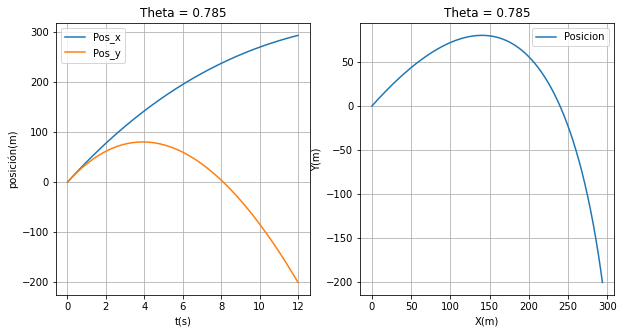

In [38]:
#Grafico
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(df['Tiempo'],df['X'], label = "Pos_x")
plt.plot(df['Tiempo'],df['Y'], label = "Pos_y")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.xlabel("t(s)")
plt.ylabel("posición(m)")
plt.grid()


#Trayectoria de la parcitula 
plt.subplot(122)
plt.plot(df['X'],df['Y'], label = "Posicion")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.grid()
plt.show()

In [39]:
#5)  Alcance maximo de la particula 

root_y = optimize.fixed_point(lambda t: t - pos_y(t,theta, *Params),8, maxiter=2000)  #Instante de tiempo donde y = 0
print("El instante en que y = 0 es en: {}s".format(root_y))
alc_max_x_1 = pos_x(root_y,theta,*Params)                     #Posicion x en el instante t donde y = 0
print("Alcance maximo con θ = 45° es: {}".format(alc_max_x_1))


El instante en que y = 0 es en: 8.111627022095586s
Alcance maximo con θ = 45° es: 239.60614945520737


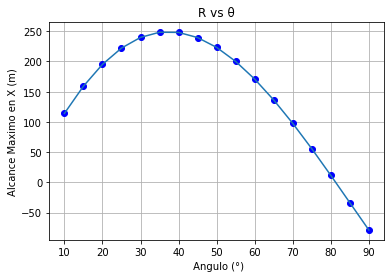

In [40]:
#6) Construya una grafica del alcance máximo R como función de  θ , varie  θ  entre 10 y 80 grados cada 5 grados.

θ = np.arange(10,95,5)        #Intervalo de angulos 

alc_max = []                  #Lista de los alcances maximos 
for i in θ:
  root_yθ = optimize.fixed_point(lambda t: t - pos_y(t,np.deg2rad(i), *Params),12, maxiter=2000) #Instante t donde y = 0 para cada angulo
  max = pos_x(root_yθ,np.deg2rad(i),*Params)     #Alcance maximo para cada angulo 
  alc_max.append(max)

#Grafica 
plt.figure()
plt.title("R vs θ")
plt.plot(θ,alc_max,'bo')
plt.plot(θ,alc_max)
plt.xlabel(" Angulo (°)")
plt.ylabel("Alcance Maximo en X (m)")
plt.grid()
plt.show()

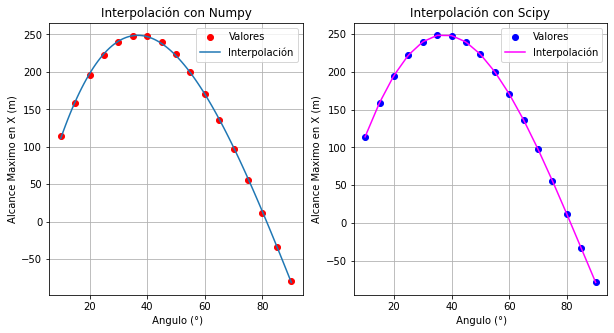

In [44]:
#7) Realice una interpolacion de R como función de theta.

#Interpolacion con numpy 
coef = np.polyfit(θ,alc_max,3)
p = np.poly1d(coef)

#Interpolación con scipy
f = interpolate.interp1d(θ,alc_max,kind='linear')


#Graficos de la interpolación 
plt.figure(figsize=(10,5))

#Grafico de la Interpolacion con numpy 
plt.subplot(121)
a = np.linspace(10,90,100)
plt.plot(θ,alc_max,'ro', label = "Valores")
plt.plot(a,p(a), label = "Interpolación")
plt.legend()
plt.title("Interpolación con Numpy")
plt.xlabel(" Angulo (°)")
plt.ylabel("Alcance Maximo en X (m)")
plt.grid()

#Grafico de la Interpolación con scipy
plt.subplot(122)
plt.plot(θ,alc_max,'bo', label = "Valores")
plt.plot(a,f(a),label = "Interpolación",color = "magenta")
plt.legend()
plt.title("Interpolación con Scipy")
plt.xlabel(" Angulo (°)")
plt.ylabel("Alcance Maximo en X (m)")
plt.grid()